# Hospital ward dynamic contacts


In [1]:
# LIBRARIES

# Data Wrangling 
import pandas as pd
import numpy as np
import operator
import math

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from tabulate import tabulate


# Network Analysis 
import networkx as nx

# SIR
from scipy.integrate import odeint

In [2]:
# Totale
G = nx.Graph()
filename = f'edges_day.csv'
with open(filename) as f:
    f.readline()
    for l in f:
        l = l.split(",")
        G.add_edge(l[0], l[1], weight=int(l[5]))
houses = {}
with open(f'nodes_day.csv') as f:
    f.readline()
    for l in f:
        node, role = l.rstrip().split(",")
        G.add_node(node, role= role)

In [3]:
# Import dataset
column_names = ["id", "role"]
df = pd.read_csv("nodes_day.csv", sep=",", names=column_names)
df = df.drop(0) # eliminazione  prima riga
df = df.reset_index(drop=True) # resettaggio indice
df['role'] = pd.Categorical(df['role']) # valori in gategoriale

df

id role
0   1152  MED
1   1157  MED
2   1671  ADM
3   1416  PAT
4   1547  PAT
..   ...  ...
69  1323  PAT
70  1332  PAT
71  1105  NUR
72  1238  NUR
73  1246  NUR

[74 rows x 2 columns]

In [4]:
print('la rete originale ha',len(G),'nodi'\
             ' e',G.number_of_edges(),'links')

la rete originale ha 74 nodi e 1066 links


In [5]:
# MISURE DI CENTRALITA'

closeness_centrality = pd.DataFrame(nx.closeness_centrality(G).items(), 
                                       columns=["node", "closeness_centrality"])
betweenness_centrality = pd.DataFrame(nx.betweenness_centrality(G).items(), 
                                       columns=["node", "betweenness_centrality"])
degree_centrality = pd.DataFrame(nx.degree_centrality(G).items(), 
                                       columns=["node", "degree_centrality"])

In [6]:
# combine centrality measurement results
centrality_summary = degree_centrality\
    .merge(closeness_centrality, on="node")\
    .merge(betweenness_centrality, on="node")

pd.set_option('display.max_rows', None)
centrality_summary.sort_values("degree_centrality", ascending=False).style.background_gradient(subset=list(centrality_summary.columns[1:]))

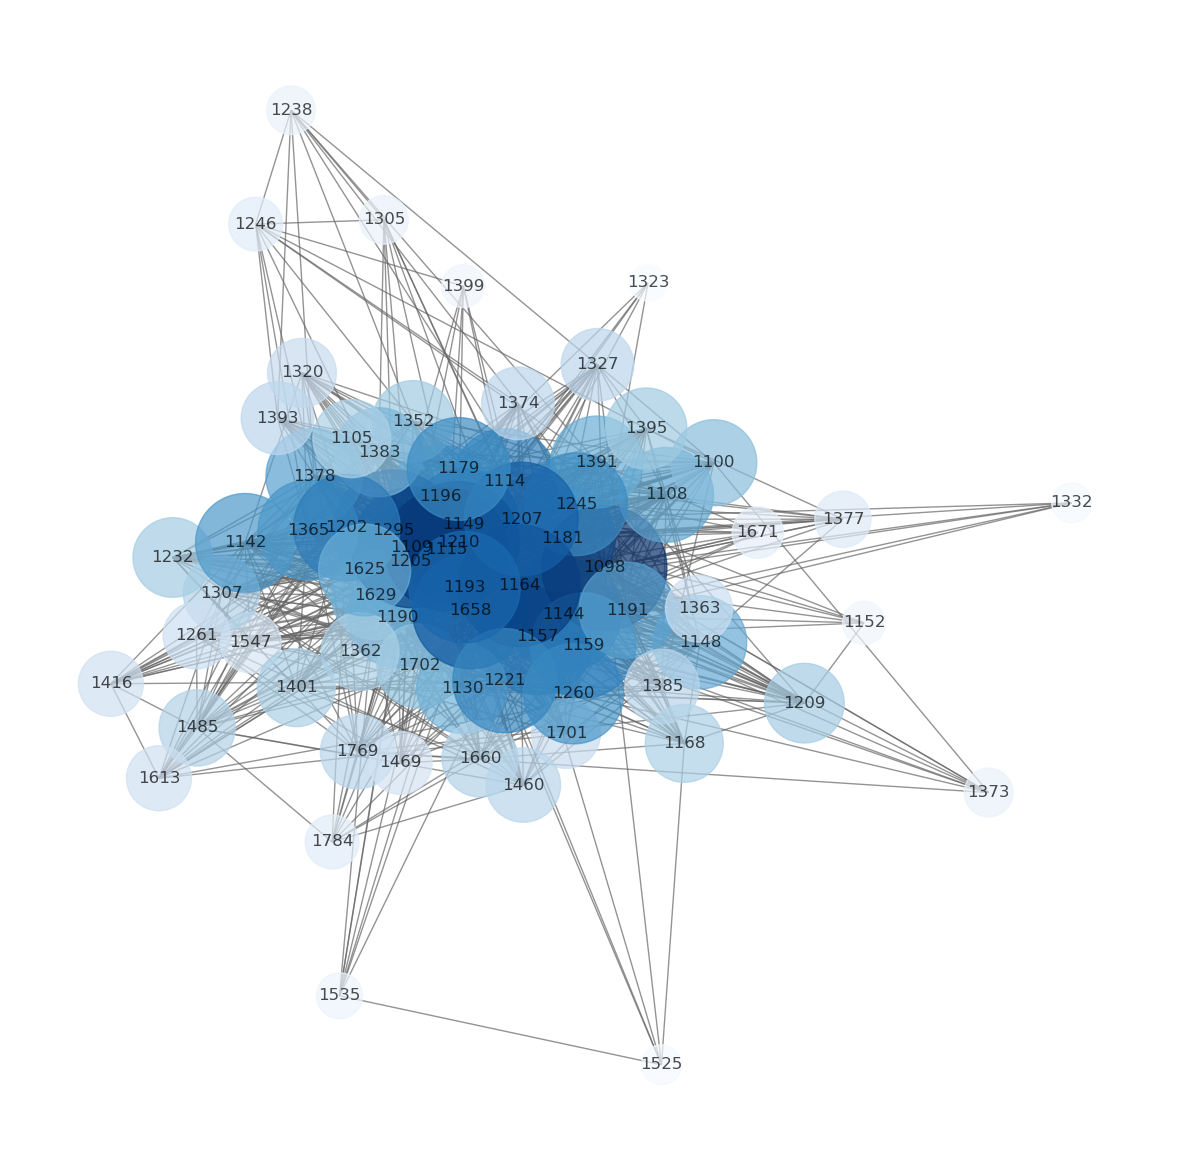

<Figure size 640x480 with 0 Axes>

In [7]:
degCent = nx.degree_centrality(G)
# Calcola il colore dei nodi in base al grado
node_color = [20000.0 * G.degree(v) for v in G]

# Calcola le dimensioni dei nodi in base alla centralità dei gradi
node_size = [v * 10000 for v in degCent.values()]

plt.figure(figsize=(15, 15))
pos= nx.fruchterman_reingold_layout(G)

# Disegna il grafo
nx.draw_networkx(G,pos=pos,node_color=node_color, node_size=node_size, cmap=plt.cm.Blues,alpha=0.7, edge_color='.4')

plt.axis('off')
plt.show()

# Analisi contatti 1098

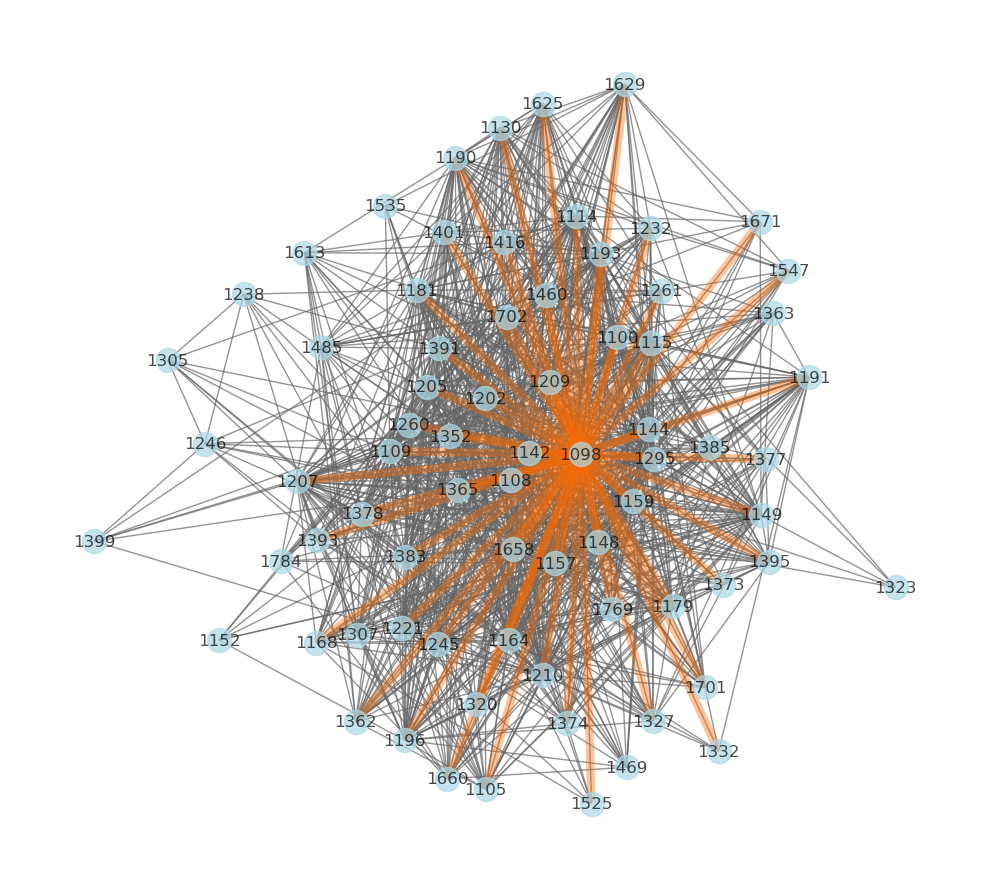

In [8]:
shortest_paths = nx.single_source_shortest_path(G, source="1098")

# Percorsi minimi di lunghezza 1
highlighted_paths1098 = [("1098", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1098"]]

pos= nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 9))
nx.draw_networkx(G, pos, node_color='lightblue', alpha=0.7, edge_color='.4')

# Disegnare i percorsi minimi
nx.draw_networkx_edges(G, pos, edgelist=highlighted_paths1098, edge_color='#fa6a02', alpha=0.4, width=6)


plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Creare il DataFrame "degrees" dal dizionario dei gradi
degrees = pd.DataFrame.from_dict(dict(G.degree()), orient='index', columns=['degree'])

# Ordinare il DataFrame in base ai valori di 'degree' in ordine decrescente
degrees = degrees.sort_values(by='degree', ascending=False)

In [10]:
degrees_valuecounts = degrees['degree'].value_counts().reset_index()
degrees_valuecounts = degrees_valuecounts.rename(columns={'index': 'degree', 'degree': 'count'})
degrees_valuecounts = degrees_valuecounts.sort_values(by='degree')

In [11]:
degrees.head()

degree
1098      59
1115      57
1210      56
1164      56
1295      55

In [12]:
len(highlighted_paths1098)

59

In [13]:
target_nodes_t1098 = ['1157','1671','1295','1181','1190','1205','1210','1232','1365','1114','1115','1629','1378','1148','1260','1391','1525','1142','1144','1658','1660','1149','1109','1374','1159','1164','1168','1373','1179','1191','1320','1196','1327','1202','1332','1207','1209','1221','1352','1245','1105','1377','1383','1393','1701','1193','1100','1108','1395','1416','1547','1460','1702','1362', '1625', '1769','1130','1261','1401']

# Filtra il DataFrame df2 per i nodi target
target_nodes_t1098_df = df[df['id'].isin(target_nodes_t1098)]

# frequenze relative
relative_frequency_r1098 = target_nodes_t1098_df['role'].value_counts()


relative_frequency_r1098 = relative_frequency_r1098.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1098.index, 'Frequenza': relative_frequency_r1098.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |    22     |
|  PAT  |    21     |
|  MED  |    10     |
|  ADM  |     6     |
+-------+-----------+


In [14]:
# frequenze percentuali

percent_frequency_table_t1098 = relative_frequency_r1098 / relative_frequency_r1098.sum().sum() * 100


percent_frequency_table_t1098 = percent_frequency_table_t1098.round(1)

# table 
table = pd.DataFrame({'Ruolo': percent_frequency_table_t1098.index, 'Frequenza': percent_frequency_table_t1098.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   37.3    |
|  PAT  |   35.6    |
|  MED  |   16.9    |
|  ADM  |   10.2    |
+-------+-----------+


# Analisi contatti 1115

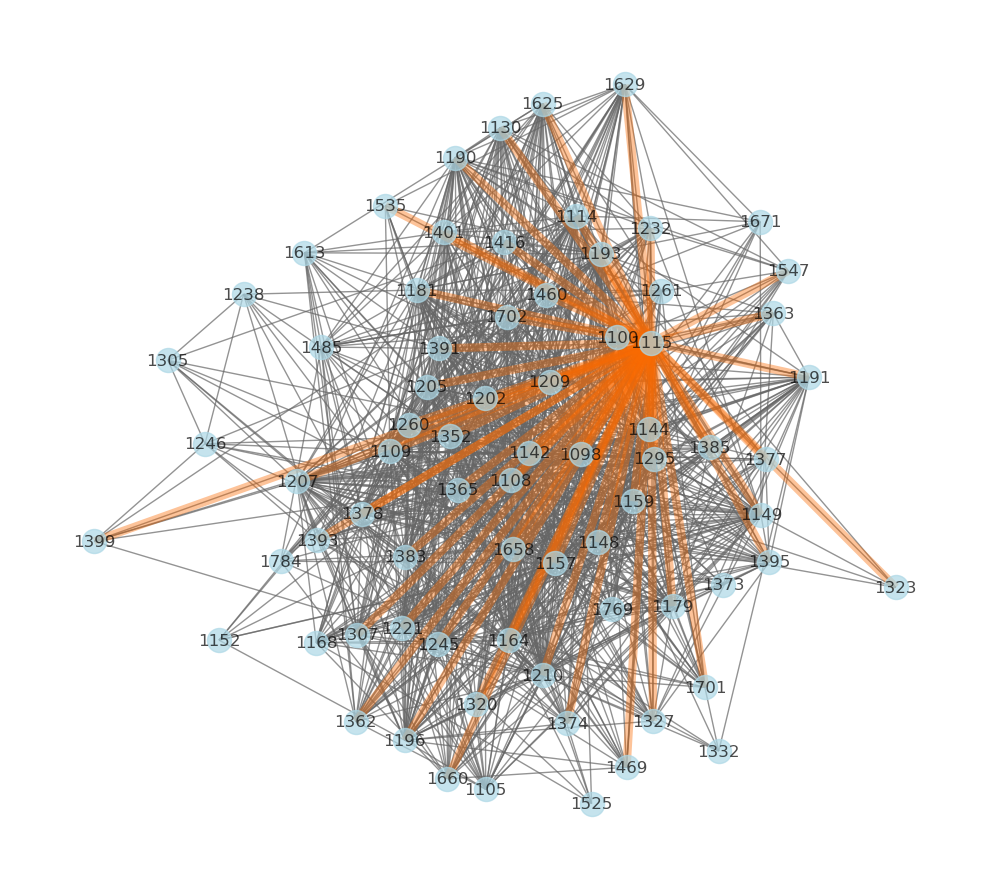

In [15]:
shortest_paths = nx.single_source_shortest_path(G, source="1115")

# Percorsi minimi di lunghezza 1
highlighted_paths1115 = [("1115", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1115"]]

pos= nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 9))
nx.draw_networkx(G, pos, node_color='lightblue', alpha=0.7, edge_color='.4')

# Disegnare i percorsi minimi
nx.draw_networkx_edges(G, pos, edgelist=highlighted_paths1115, edge_color='#fa6a02', alpha=0.4, width=6)


plt.axis('off')
plt.tight_layout()
plt.show()

In [16]:
len(highlighted_paths1115)

57

In [17]:
target_nodes_t1115 =['1157','1416','1547', '1295', '1307', '1181', '1190', '1196', '1460', '1205', '1209', '1210', '1469', '1352', '1098', '1232', '1144', '1362', '1108', '1365','1114','1702','1629','1378','1383','1130','1260','1391','1142','1401','1658','1660','1149','1109','1374','1164','1179','1191','1320','1323','1327','1207', '1363','1245','1377','1393','1395','1399','1159','1193','1148', '1221', '1100', '1385', '1701', '1625', '1535']

# Filtra il DataFrame df2 per i nodi target
target_nodes_t1115_df = df[df['id'].isin(target_nodes_t1115)]

# frequenze relative
relative_frequency_t1115 = target_nodes_t1115_df['role'].value_counts()


relative_frequency_t1115 = relative_frequency_t1115.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_t1115.index, 'Frequenza': relative_frequency_t1115.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    24     |
|  NUR  |    18     |
|  MED  |     9     |
|  ADM  |     6     |
+-------+-----------+


In [18]:
# frequenze percentuali

percent_frequency_table_t1115 = relative_frequency_t1115 / relative_frequency_t1115.sum().sum() * 100


percent_frequency_table_t1115 = percent_frequency_table_t1115.round(1)

# table 
table = pd.DataFrame({'Ruolo': percent_frequency_table_t1115.index, 'Frequenza': percent_frequency_table_t1115.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |   42.1    |
|  NUR  |   31.6    |
|  MED  |   15.8    |
|  ADM  |   10.5    |
+-------+-----------+


# Analisi contatti 1164

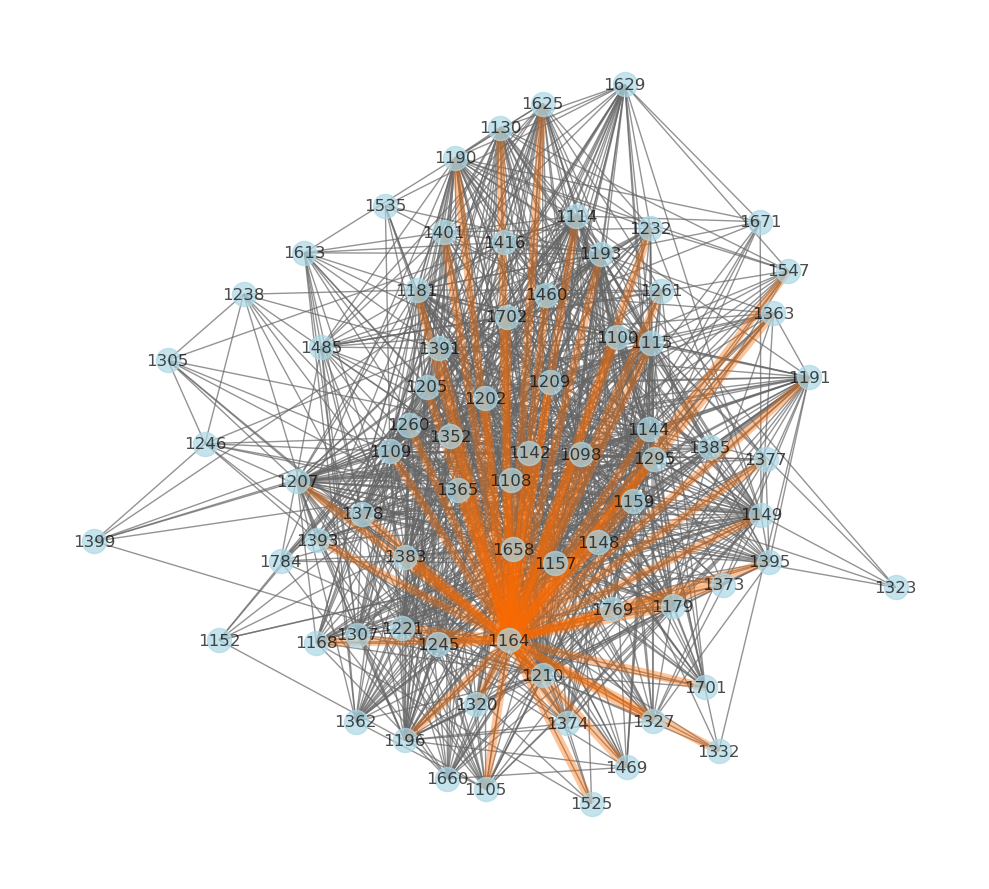

In [19]:
shortest_paths = nx.single_source_shortest_path(G, source="1164")

# Percorsi minimi di lunghezza 1
highlighted_paths1164 = [("1164", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1164"]]

pos= nx.kamada_kawai_layout(G)
plt.figure(figsize=(10, 9))
nx.draw_networkx(G, pos, node_color='lightblue', alpha=0.7, edge_color='.4')

# Disegnare i percorsi minimi
nx.draw_networkx_edges(G, pos, edgelist=highlighted_paths1164, edge_color='#fa6a02', alpha=0.4, width=6)


plt.axis('off')
plt.tight_layout()
plt.show()

In [20]:
len(highlighted_paths1164)

56

In [21]:
target_nodes_1164 =['1157','1374','1159','1295','1168', '1245','1179','1181','1191','1320','1196','1327','1202','1332','1205','1207','1209','1210','1352','1098','1100','1105','1363','1108','1109','1114','1115','1373','1377','1260','1395','1144','1148','1149','1365','1701','1702','1193','1221','1625','1378','1769','1130','1391','1393','1401','1658','1547','1190','1460','1469','1232','1383','1261','1525','1142']
# Filtra il DataFrame df2 per i nodi target
target_nodes_t1164_df = df[df['id'].isin(target_nodes_1164)]

# frequenze relative
relative_frequency_rt1164 = target_nodes_t1164_df['role'].value_counts()


relative_frequency_rt1164 = relative_frequency_rt1164.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_rt1164.index, 'Frequenza': relative_frequency_rt1164.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    21     |
|  NUR  |    20     |
|  MED  |     9     |
|  ADM  |     6     |
+-------+-----------+


In [22]:
# frequenze %

percent_frequency_table1164 = relative_frequency_rt1164 / relative_frequency_rt1164.sum().sum() * 100


percent_frequency_table1164 = percent_frequency_table1164.round(1)

# table 
table = pd.DataFrame({'Ruolo': percent_frequency_table1164.index, 'Frequenza': percent_frequency_table1164.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |   37.5    |
|  NUR  |   35.7    |
|  MED  |   16.1    |
|  ADM  |   10.7    |
+-------+-----------+


# Coefficiente di clustering locale (LCC) 


In [23]:
# find nodes with LCC score of > 0.5:
# means that > 50% of change a node n's friends are friends of each other
node_data = dict(G.nodes(data="club"))
LCC_df = pd.DataFrame(sorted(nx.clustering(G).items(), 
                                 key=lambda item: -item[1]), 
                      columns=["node", "LCC"])

# output the dataframe of LCC
print(round(100 * len(LCC_df.query("LCC > 0.5")) / len(LCC_df), 1),
      "% of the nodes have Local Cluster Coefficients > 0.5")
LCC_df.query("LCC > 0.5").head(3)

91.9 % of the nodes have Local Cluster Coefficients > 0.5


node       LCC
0  1332  1.000000
1  1671  0.955556
2  1377  0.954545

# Analizziamo il sottografo del nodo 1332 che ha LCC = 1
I suoi vicini tendono a collegarsi tra loro

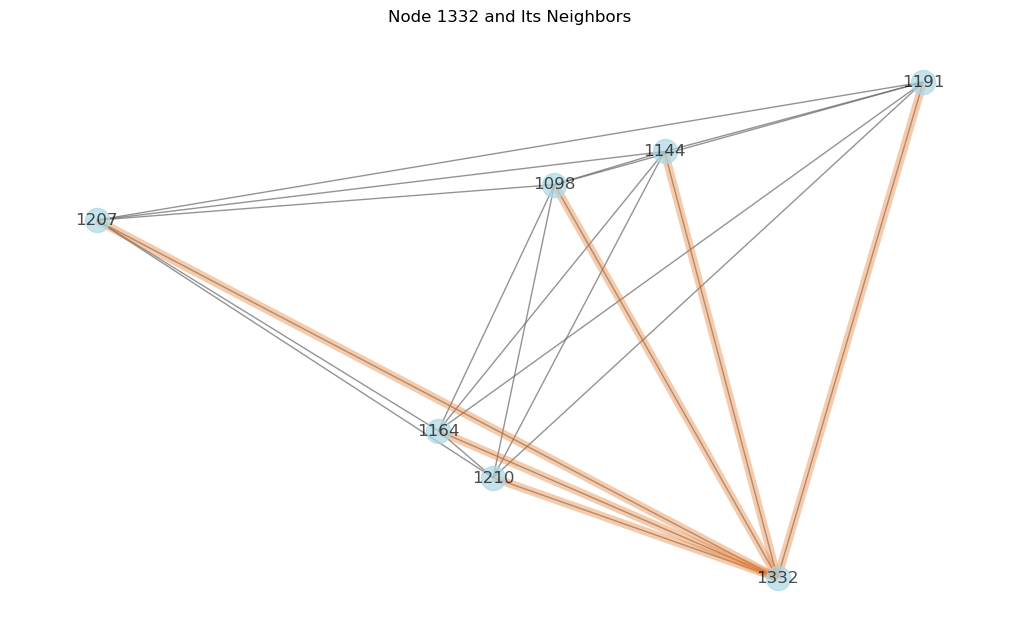

In [24]:
# Specifica il nodo di interesse
target_node1332 = "1332"

# Ottieni i vicini del nodo di interesse
neighbor_nodes = [target_node1332] + [n for n in G.neighbors(target_node1332)]

shortest_paths = nx.single_source_shortest_path(G, source=target_node1332)

# Percorsi minimi di lunghezza 1
highlighted_paths1332 = [(target_node1332, target) for target, path in shortest_paths.items()
                     if len(path) == 2]


# Crea un sottografo contenente il nodo di interesse e i suoi vicini
subgraph = G.subgraph(neighbor_nodes)

# Calcola una posizione per i nodi
pos= nx.kamada_kawai_layout(G)

# Disegna il sottografo
plt.figure(figsize=(10, 6))
nx.draw(subgraph, pos=pos, with_labels=True, node_color='lightblue', alpha=0.7, edge_color='.4', font_color='black')

# Disegnare i percorsi minimi
nx.draw_networkx_edges(G, pos, edgelist=highlighted_paths1332, edge_color='#E67D32', alpha=0.4, width=6)

plt.title("Node {} and Its Neighbors".format(target_node1332))
plt.show() 

In [25]:
target_nodes_c1132 =['1164', '1191', '1098', '1207', '1144', '1210']

# Filtra il DataFrame df2 per i nodi target
target_nodes_c1132_df = df[df['id'].isin(target_nodes_c1132)]

# frequenze relative
relative_frequency_r1132 = target_nodes_c1132_df['role'].value_counts()


relative_frequency_r1132 = relative_frequency_r1132.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1132.index, 'Frequenza': relative_frequency_r1132.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |     3     |
|  MED  |     2     |
|  ADM  |     1     |
|  PAT  |     0     |
+-------+-----------+


In [26]:
# Frequenze %

pec_frequency_table1132 = relative_frequency_r1132 / relative_frequency_r1132.sum().sum() * 100


pec_frequency_table1132 = pec_frequency_table1132.round(1)

# table 
table = pd.DataFrame({'Ruolo': pec_frequency_table1132.index, 'Frequenza': pec_frequency_table1132.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   50.0    |
|  MED  |   33.3    |
|  ADM  |   16.7    |
|  PAT  |    0.0    |
+-------+-----------+


# Analizziamo il sottografo del nodo 1671 che ha LCC = 0.955
I suoi vicini tendono a collegarsi tra loro

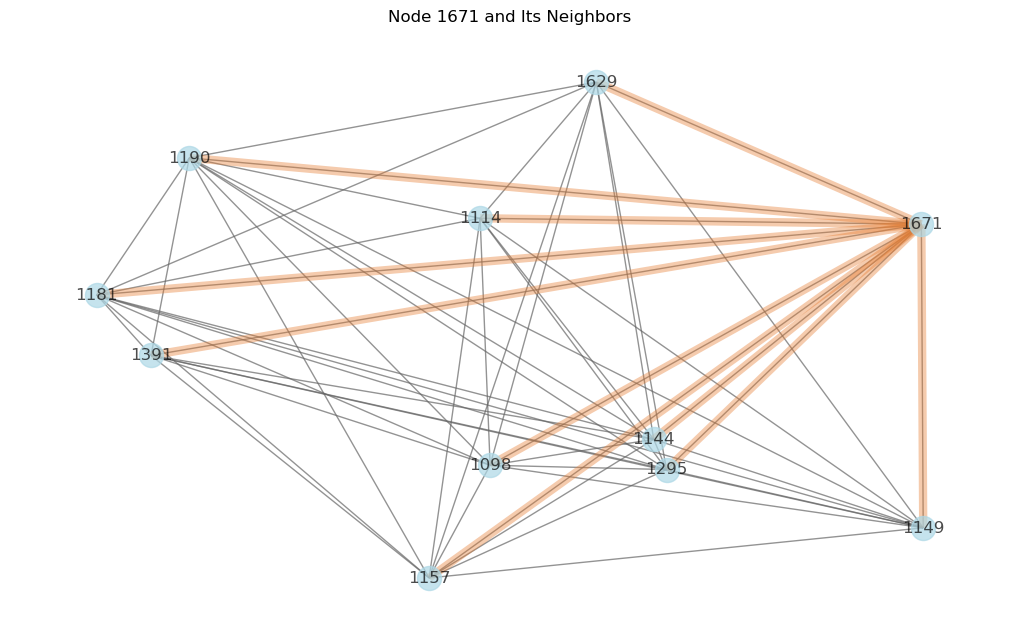

In [27]:
# Specifica il nodo di interesse
target_node = "1671"

# Ottieni i vicini del nodo di interesse
neighbor_nodes = [target_node] + [n for n in G.neighbors(target_node)]

shortest_paths = nx.single_source_shortest_path(G, source=target_node)

# Percorsi minimi di lunghezza 1
highlighted_paths = [(target_node, target) for target, path in shortest_paths.items()
                     if len(path) == 2]


# Crea un sottografo contenente il nodo di interesse e i suoi vicini
subgraph = G.subgraph(neighbor_nodes)

# Calcola una posizione per i nodi
pos= nx.kamada_kawai_layout(G)

# Disegna il sottografo
plt.figure(figsize=(10, 6))
nx.draw(subgraph, pos=pos, with_labels=True, node_color='lightblue', alpha=0.7, edge_color='.4', font_color='black')

# Disegnare i percorsi minimi
nx.draw_networkx_edges(G, pos, edgelist=highlighted_paths, edge_color='#E67D32', alpha=0.4, width=6)

plt.title("Node {} and Its Neighbors".format(target_node))
plt.show() 

In [28]:
target_nodes_c1671 = ['1157','1190','1098','1629','1181','1391','1144','1114','1295','1149']

# Filtra il DataFrame df2 per i nodi target
target_nodes_c1671_df = df[df['id'].isin(target_nodes_c1671)]

# frequenze relative
relative_frequency_r1671 = target_nodes_c1671_df['role'].value_counts()


relative_frequency_r1671 = relative_frequency_r1671.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1671.index, 'Frequenza': relative_frequency_r1671.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |     6     |
|  MED  |     2     |
|  ADM  |     1     |
|  PAT  |     1     |
+-------+-----------+


In [29]:
#  frequenze %

perc_frequency_r1671 = relative_frequency_r1671 / relative_frequency_r1671.sum().sum() * 100

perc_frequency_r1671 = perc_frequency_r1671.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_r1671.index, 'Frequenza': perc_frequency_r1671.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   60.0    |
|  MED  |   20.0    |
|  ADM  |   10.0    |
|  PAT  |   10.0    |
+-------+-----------+


# Analizziamo il sottografo del nodo 1377 che ha LCC = 0.954
I suoi vicini tendono a collegarsi tra loro

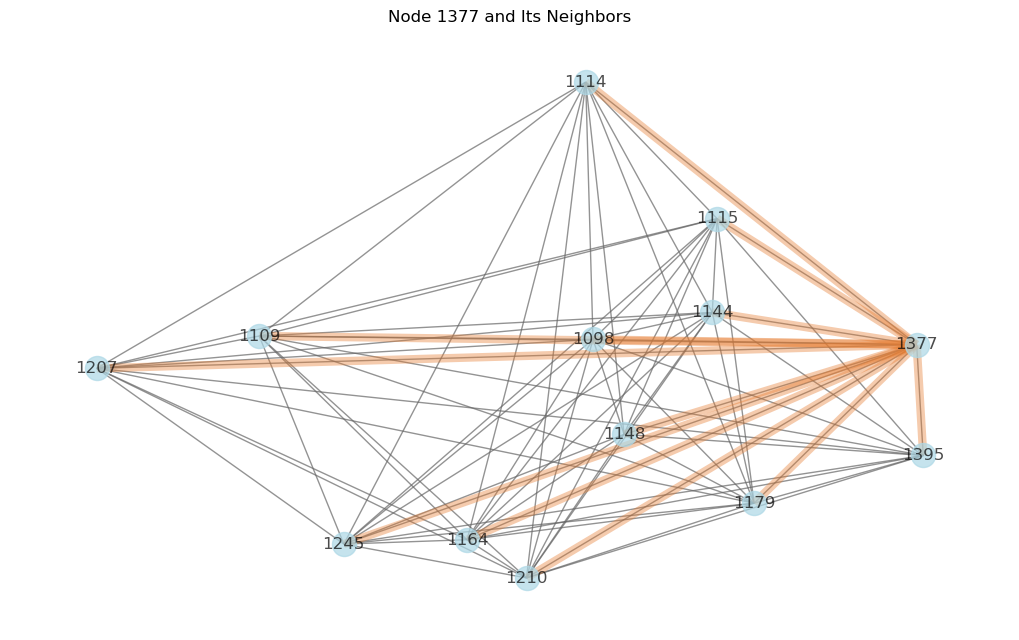

In [30]:
# Specifica il nodo di interesse
target_node = "1377"

# Ottieni i vicini del nodo di interesse
neighbor_nodes = [target_node] + [n for n in G.neighbors(target_node)]

shortest_paths = nx.single_source_shortest_path(G, source=target_node)

# Percorsi minimi di lunghezza 1
highlighted_paths = [(target_node, target) for target, path in shortest_paths.items()
                     if len(path) == 2]


# Crea un sottografo contenente il nodo di interesse e i suoi vicini
subgraph = G.subgraph(neighbor_nodes)

# Calcola una posizione per i nodi
pos= nx.kamada_kawai_layout(G)

# Disegna il sottografo
plt.figure(figsize=(10, 6))
nx.draw(subgraph, pos=pos, with_labels=True, node_color='lightblue', alpha=0.7, edge_color='.4', font_color='black')

# Disegnare i percorsi minimi
nx.draw_networkx_edges(G, pos, edgelist=highlighted_paths, edge_color='#E67D32', alpha=0.4, width=6)

plt.title("Node {} and Its Neighbors".format(target_node))
plt.show() 

In [31]:
target_nodes_1377 = ['1164','1179','1207','1210','1098','1114','1115','1245','1395','1109','1144','1148']

# Filtra il DataFrame df2 per i nodi target
target_nodes_1377_df = df[df['id'].isin(target_nodes_1377)]

# frequenze relative
relative_frequency_r1377 = target_nodes_1377_df['role'].value_counts()


relative_frequency_r1377 = relative_frequency_r1377.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1377.index, 'Frequenza': relative_frequency_r1377.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |     7     |
|  ADM  |     2     |
|  MED  |     2     |
|  PAT  |     1     |
+-------+-----------+


In [32]:
# frequenze %

relative_frequency_table_1377 = relative_frequency_r1377 / relative_frequency_r1377.sum().sum() * 100


relative_frequency_table_1377 = relative_frequency_table_1377.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_table_1377.index, 'Frequenza': relative_frequency_table_1377.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   58.3    |
|  ADM  |   16.7    |
|  MED  |   16.7    |
|  PAT  |    8.3    |
+-------+-----------+


# Analisi per giorni

In [33]:
# Per giorni
def read_net(day):
    G = nx.Graph()
    filename = f'edges_day_v{day}.csv'
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            G.add_edge(l[0], l[1], weight=int(l[5]))
    houses = {}
    with open(f'nodes_day_v{day}.csv') as f:
        f.readline()
        for l in f:
            node, _, role = l.rstrip().split(",")
            G.add_node(node, role= role)
            
    return G

# GIORNO 1

In [34]:
G1 = read_net(1)

In [35]:
print('la rete originale ha',len(G1),'nodi'\
             ' e',G1.number_of_edges(),'links')

la rete originale ha 43 nodi e 179 links


# Giorno 2

In [36]:
G2 = read_net(2)

In [37]:
print('la rete originale ha',len(G2),'nodi'\
             ' e',G2.number_of_edges(),'links')

la rete originale ha 49 nodi e 474 links


In [38]:
G2.nodes()

NodeView(('1157', '1159', '1383', '1320', '1260', '1098', '1191', '1164', '1305', '1295', '1108', '1109', '1207', '1144', '1209', '1114', '1115', '1148', '1365', '1374', '1179', '1196', '1202', '1205', '1238', '1149', '1246', '1168', '1323', '1245', '1210', '1221', '1100', '1105', '1362', '1373', '1181', '1327', '1332', '1352', '1363', '1377', '1395', '1378', '1393', '1399', '1385', '1307', '1391'))

In [39]:
target_nodes_g2 = ['1157', '1159', '1383', '1320', '1260', '1098', '1191', '1164', '1305', '1295', '1108', '1109', '1207', '1144', '1209', '1114', '1115', '1148', '1365', '1374', '1179', '1196', '1202', '1205', '1238', '1149', '1246', '1168', '1323', '1245', '1210', '1221', '1100', '1105', '1362', '1373', '1181', '1327', '1332', '1352', '1363', '1377', '1395', '1378', '1393', '1399', '1385', '1307', '1391']

# Filtra il DataFrame df2 per i nodi target
target_nodes_g2_df = df[df['id'].isin(target_nodes_g2)]

# frequenze relative
relative_frequency_g2 = target_nodes_g2_df['role'].value_counts()


relative_frequency_g2 = relative_frequency_g2.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_g2.index, 'Frequenza': relative_frequency_g2.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    20     |
|  NUR  |    18     |
|  MED  |     8     |
|  ADM  |     3     |
+-------+-----------+


# analisi contatti nodo 1207

In [40]:
shortest_paths = nx.single_source_shortest_path(G2, source="1207")

# Percorsi minimi di lunghezza 1
highlighted_paths1207 = [("1207", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1207"]]

In [41]:
highlighted_paths1207

[('1207', '1157'),
 ('1207', '1374'),
 ('1207', '1159'),
 ('1207', '1164'),
 ('1207', '1295'),
 ('1207', '1168'),
 ('1207', '1373'),
 ('1207', '1305'),
 ('1207', '1181'),
 ('1207', '1179'),
 ('1207', '1191'),
 ('1207', '1320'),
 ('1207', '1323'),
 ('1207', '1196'),
 ('1207', '1327'),
 ('1207', '1202'),
 ('1207', '1332'),
 ('1207', '1245'),
 ('1207', '1209'),
 ('1207', '1210'),
 ('1207', '1352'),
 ('1207', '1098'),
 ('1207', '1100'),
 ('1207', '1105'),
 ('1207', '1363'),
 ('1207', '1108'),
 ('1207', '1365'),
 ('1207', '1114'),
 ('1207', '1115'),
 ('1207', '1377'),
 ('1207', '1378'),
 ('1207', '1383'),
 ('1207', '1260'),
 ('1207', '1391'),
 ('1207', '1393'),
 ('1207', '1395'),
 ('1207', '1399'),
 ('1207', '1144'),
 ('1207', '1149'),
 ('1207', '1109')]

In [42]:
target_nodes_1207 = ['1157','1374','1159','1164','1295','1168','1373','1305','1181','1179','1191','1320','1323','1196','1327','1202','1332','1245','1209','1210','1352','1098','1100','1105','1363','1108','1365','1114','1115','1377','1378','1383','1260','1391','1393','1395','1399','1144','1149','1109']

# Filtra il DataFrame df2 per i nodi target
target_nodes_1207_df = df[df['id'].isin(target_nodes_1207)]

# frequenze relative
relative_frequency_1207 = target_nodes_1207_df['role'].value_counts()


relative_frequency_1207 = relative_frequency_1207.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_1207.index, 'Frequenza': relative_frequency_1207.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    17     |
|  NUR  |    14     |
|  MED  |     6     |
|  ADM  |     3     |
+-------+-----------+


In [43]:
# frequenze %

perc_frequency_table1207 = relative_frequency_1207 / relative_frequency_1207.sum().sum() * 100

perc_frequency_table1207 = perc_frequency_table1207.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_table1207.index, 'Frequenza': perc_frequency_table1207.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |   42.5    |
|  NUR  |   35.0    |
|  MED  |   15.0    |
|  ADM  |    7.5    |
+-------+-----------+


# analisi contatti nodo 1098

In [44]:
shortest_paths = nx.single_source_shortest_path(G2, source="1098")

# Percorsi minimi di lunghezza 1
highlighted_paths1098 = [("1098", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1098"]]

In [45]:
highlighted_paths1098

[('1098', '1157'),
 ('1098', '1374'),
 ('1098', '1159'),
 ('1098', '1164'),
 ('1098', '1295'),
 ('1098', '1168'),
 ('1098', '1373'),
 ('1098', '1181'),
 ('1098', '1179'),
 ('1098', '1191'),
 ('1098', '1320'),
 ('1098', '1196'),
 ('1098', '1327'),
 ('1098', '1202'),
 ('1098', '1332'),
 ('1098', '1205'),
 ('1098', '1207'),
 ('1098', '1209'),
 ('1098', '1210'),
 ('1098', '1221'),
 ('1098', '1352'),
 ('1098', '1245'),
 ('1098', '1105'),
 ('1098', '1365'),
 ('1098', '1114'),
 ('1098', '1115'),
 ('1098', '1377'),
 ('1098', '1378'),
 ('1098', '1383'),
 ('1098', '1260'),
 ('1098', '1391'),
 ('1098', '1393'),
 ('1098', '1144'),
 ('1098', '1148'),
 ('1098', '1149'),
 ('1098', '1109')]

In [46]:
target_nodes_c1098 =['1157','1374','1159','1164','1295','1168','1373','1181','1179','1191','1320','1196','1327','1202','1332','1205','1207','1209','1210','1221','1352','1245','1105','1365','1114','1115','1377','1378','1383','1260','1391','1393','1144','1148','1149','1109']

# Filtra il DataFrame df2 per i nodi target
target_nodes_c1098_df = df[df['id'].isin(target_nodes_c1098)]

# frequenze relative
relative_frequency_r1098 = target_nodes_c1098_df['role'].value_counts()


relative_frequency_r1098 = relative_frequency_r1098.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1098.index, 'Frequenza': relative_frequency_r1098.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |    14     |
|  PAT  |    12     |
|  MED  |     8     |
|  ADM  |     2     |
+-------+-----------+


In [47]:
# frequenze percentuali 

perc_frequency_table1098 = relative_frequency_r1098 / relative_frequency_r1098.sum().sum() * 100

perc_frequency_table1098 = perc_frequency_table1098.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_table1098.index, 'Frequenza': perc_frequency_table1098.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   38.9    |
|  PAT  |   33.3    |
|  MED  |   22.2    |
|  ADM  |    5.6    |
+-------+-----------+


# Giorno 3

In [48]:
G3 = read_net(3)

In [49]:
print('la rete originale ha',len(G3),'nodi'\
             ' e',G3.number_of_edges(),'links')

la rete originale ha 49 nodi e 452 links


In [50]:
G3.nodes()


NodeView(('1157', '1159', '1164', '1295', '1307', '1181', '1179', '1702', '1320', '1193', '1373', '1205', '1207', '1221', '1352', '1098', '1100', '1362', '1363', '1108', '1365', '1625', '1115', '1245', '1374', '1378', '1383', '1148', '1130', '1260', '1391', '1142', '1144', '1658', '1660', '1109', '1701', '1209', '1210', '1769', '1416', '1613', '1168', '1327', '1393', '1395', '1401', '1385', '1485'))

In [51]:
target_nodes_g3 = ['1157', '1159', '1164', '1295', '1307', '1181', '1179', '1702', '1320', '1193', '1373', '1205', '1207', '1221', '1352', '1098', '1100', '1362', '1363', '1108', '1365', '1625', '1115', '1245', '1374', '1378', '1383', '1148', '1130', '1260', '1391', '1142', '1144', '1658', '1660', '1109', '1701', '1209', '1210', '1769', '1416', '1613', '1168', '1327', '1393', '1395', '1401', '1385', '1485']

# Filtra il DataFrame df2 per i nodi target
target_nodes_g3_df = df[df['id'].isin(target_nodes_g3)]

# frequenze relative
relative_frequency_g3 = target_nodes_g3_df['role'].value_counts()


relative_frequency_g3 = relative_frequency_g3.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_g3.index, 'Frequenza': relative_frequency_g3.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    20     |
|  NUR  |    16     |
|  MED  |     9     |
|  ADM  |     4     |
+-------+-----------+


# analisi contatti nodo 1207

In [52]:
shortest_paths = nx.single_source_shortest_path(G3, source="1207")

# Percorsi minimi di lunghezza 1
highlighted_paths1207 = [("1207", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1207"]]

In [53]:
highlighted_paths1207

[('1207', '1157'),
 ('1207', '1159'),
 ('1207', '1164'),
 ('1207', '1295'),
 ('1207', '1373'),
 ('1207', '1179'),
 ('1207', '1181'),
 ('1207', '1307'),
 ('1207', '1193'),
 ('1207', '1327'),
 ('1207', '1205'),
 ('1207', '1245'),
 ('1207', '1209'),
 ('1207', '1210'),
 ('1207', '1221'),
 ('1207', '1352'),
 ('1207', '1098'),
 ('1207', '1100'),
 ('1207', '1362'),
 ('1207', '1363'),
 ('1207', '1108'),
 ('1207', '1109'),
 ('1207', '1115'),
 ('1207', '1374'),
 ('1207', '1378'),
 ('1207', '1383'),
 ('1207', '1385'),
 ('1207', '1130'),
 ('1207', '1391'),
 ('1207', '1393'),
 ('1207', '1395'),
 ('1207', '1142'),
 ('1207', '1144'),
 ('1207', '1658'),
 ('1207', '1365')]

In [54]:
target_nodes_c1207 =['1157','1159','1164','1295','1373','1179','1181','1307','1193','1327','1205','1245','1209', '1210','1221','1352','1098','1100','1362','1363','1108','1109','1115','1374','1378','1383','1385','1130','1391','1393','1395','1142','1144','1658','1365']
# Filtra il DataFrame df2 per i nodi target
target_nodes_c1207_df = df[df['id'].isin(target_nodes_c1207)]

# frequenze relative
relative_frequency_r1207 = target_nodes_c1207_df['role'].value_counts()


relative_frequency_r1207 = relative_frequency_r1207.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1207.index, 'Frequenza': relative_frequency_r1207.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    14     |
|  NUR  |    12     |
|  MED  |     5     |
|  ADM  |     4     |
+-------+-----------+


In [55]:
# frequenze %

perc_frequency_table1207 = relative_frequency_r1207 / relative_frequency_r1207.sum().sum() * 100

perc_frequency_table1207 = perc_frequency_table1207.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_table1207.index, 'Frequenza': perc_frequency_table1207.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |   40.0    |
|  NUR  |   34.3    |
|  MED  |   14.3    |
|  ADM  |   11.4    |
+-------+-----------+


# analisi contatti nodo 1115


In [56]:
shortest_paths = nx.single_source_shortest_path(G3, source="1115")

# Percorsi minimi di lunghezza 1
highlighted_paths115 = [("1115", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1115"]]

In [57]:
highlighted_paths115

[('1115', '1157'),
 ('1115', '1159'),
 ('1115', '1164'),
 ('1115', '1295'),
 ('1115', '1179'),
 ('1115', '1181'),
 ('1115', '1307'),
 ('1115', '1702'),
 ('1115', '1320'),
 ('1115', '1193'),
 ('1115', '1327'),
 ('1115', '1148'),
 ('1115', '1207'),
 ('1115', '1209'),
 ('1115', '1210'),
 ('1115', '1221'),
 ('1115', '1352'),
 ('1115', '1098'),
 ('1115', '1100'),
 ('1115', '1363'),
 ('1115', '1108'),
 ('1115', '1109'),
 ('1115', '1365'),
 ('1115', '1245'),
 ('1115', '1374'),
 ('1115', '1378'),
 ('1115', '1383'),
 ('1115', '1385'),
 ('1115', '1130'),
 ('1115', '1260'),
 ('1115', '1391'),
 ('1115', '1393'),
 ('1115', '1395'),
 ('1115', '1144'),
 ('1115', '1658'),
 ('1115', '1660')]

In [58]:
target_nodes_c1115 =['1157','1159','1164','1295','1179','1181','1307','1702','1320','1193','1327','1148','1207','1209','1210','1221','1352','1098','1100','1363','1108','1109','1365','1245','1374','1378','1383','1385','1130','1260','1391','1393','1395','1144','1658','1660']

# Filtra il DataFrame df2 per i nodi target
target_nodes_c1115_df = df[df['id'].isin(target_nodes_c1115)]

#  frequenze relative
relative_frequency_r1115 = target_nodes_c1115_df['role'].value_counts()


relative_frequency_r1115 = relative_frequency_r1115.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1115.index, 'Frequenza': relative_frequency_r1115.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    14     |
|  NUR  |    10     |
|  MED  |     8     |
|  ADM  |     4     |
+-------+-----------+


In [59]:
# frequenze %
perc_frequency_table1115 = relative_frequency_r1115 / relative_frequency_r1115.sum().sum() * 100


perc_frequency_table1115 = perc_frequency_table1115.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_table1115.index, 'Frequenza': perc_frequency_table1115.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |   38.9    |
|  NUR  |   27.8    |
|  MED  |   22.2    |
|  ADM  |   11.1    |
+-------+-----------+


# Giorno 4

In [60]:
G4 = read_net(4)

In [61]:
print('la rete originale ha',len(G4),'nodi'\
             ' e',G4.number_of_edges(),'links')

la rete originale ha 50 nodi e 422 links


In [62]:
G4.nodes()

NodeView(('1157', '1159', '1164', '1295', '1168', '1181', '1701', '1702', '1193', '1202', '1205', '1209', '1210', '1221', '1352', '1098', '1100', '1362', '1108', '1365', '1625', '1115', '1373', '1378', '1190', '1383', '1660', '1130', '1260', '1261', '1391', '1144', '1401', '1658', '1148', '1460', '1416', '1485', '1142', '1613', '1547', '1232', '1469', '1525', '1307', '1385', '1769', '1363', '1535', '1784'))

In [63]:
target_nodes_g4 = ['1157', '1159', '1164', '1295', '1168', '1181', '1701', '1702', '1193', '1202', '1205', '1209', '1210', '1221', '1352', '1098', '1100', '1362', '1108', '1365', '1625', '1115', '1373', '1378', '1190', '1383', '1660', '1130', '1260', '1261', '1391', '1144', '1401', '1658', '1148', '1460', '1416', '1485', '1142', '1613', '1547', '1232', '1469', '1525', '1307', '1385', '1769', '1363', '1535', '1784']

# Filtra il DataFrame df2 per i nodi target
target_nodes_g4_df = df[df['id'].isin(target_nodes_g4)]

# frequenze relative
relative_frequency_g4 = target_nodes_g4_df['role'].value_counts()


relative_frequency_g4 = relative_frequency_g4.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_g4.index, 'Frequenza': relative_frequency_g4.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    19     |
|  NUR  |    16     |
|  MED  |     9     |
|  ADM  |     6     |
+-------+-----------+


# Analisi contatti nodo 1193

In [64]:
shortest_paths = nx.single_source_shortest_path(G4, source="1193")

# Percorsi minimi di lunghezza 1
highlighted_paths1193 = [("1193", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1193"]]

In [65]:
target_nodes_1193 =['1157','1159','1416','1164','1295','1181','1190','1202','1460','1205','1210','1469','1352','1098','1485','1613','1232','1362','1363','1108','1365','1625','1115','1378','1385','1130','1260','1391','1144','1401','1658','1148','1535']

# Filtra il DataFrame df2 per i nodi target
target_nodes_1193_df = df[df['id'].isin(target_nodes_1193)]

# relative_frequency %
relative_frequency_r1193 = target_nodes_1193_df['role'].value_counts()


relative_frequency_r1193 = relative_frequency_r1193.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1193.index, 'Frequenza': relative_frequency_r1193.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |    12     |
|  PAT  |    11     |
|  MED  |     6     |
|  ADM  |     4     |
+-------+-----------+


In [66]:
# frequenze %
perc_frequency_table1193 = relative_frequency_r1193 / relative_frequency_r1193.sum().sum() * 100


perc_frequency_table1193 = perc_frequency_table1193.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_table1193.index, 'Frequenza': perc_frequency_table1193.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   36.4    |
|  PAT  |   33.3    |
|  MED  |   18.2    |
|  ADM  |   12.1    |
+-------+-----------+


# Analisi contatti nodo 1157 

In [67]:
shortest_paths = nx.single_source_shortest_path(G4, source="1157")

# Percorsi minimi di lunghezza 1
highlighted_paths1157 = [("1157", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1157"]]

In [68]:
highlighted_paths1157

[('1157', '1159'),
 ('1157', '1164'),
 ('1157', '1295'),
 ('1157', '1168'),
 ('1157', '1181'),
 ('1157', '1701'),
 ('1157', '1702'),
 ('1157', '1193'),
 ('1157', '1202'),
 ('1157', '1205'),
 ('1157', '1209'),
 ('1157', '1210'),
 ('1157', '1221'),
 ('1157', '1352'),
 ('1157', '1098'),
 ('1157', '1100'),
 ('1157', '1362'),
 ('1157', '1108'),
 ('1157', '1365'),
 ('1157', '1625'),
 ('1157', '1115'),
 ('1157', '1373'),
 ('1157', '1378'),
 ('1157', '1190'),
 ('1157', '1383'),
 ('1157', '1660'),
 ('1157', '1130'),
 ('1157', '1260'),
 ('1157', '1261'),
 ('1157', '1391'),
 ('1157', '1144'),
 ('1157', '1401'),
 ('1157', '1658'),
 ('1157', '1148')]

In [69]:
target_nodes_c1157 =['1159','1164','1295','1168','1181','1701','1702','1193','1202','1205','1209','1210','1221','1352','1098','1100','1362','1108','1365','1625','1115','1373','1378','1190','1383','1660','1130','1260','1261','1391','1144','1401','1658','1148']

# Filtra il DataFrame df2 per i nodi target
target_nodes_c1157_df = df[df['id'].isin(target_nodes_c1157)]

# frequenze relative

relative_frequency_r1157 = target_nodes_c1157_df['role'].value_counts()


relative_frequency_r1157 = relative_frequency_r1157.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1157.index, 'Frequenza': relative_frequency_r1157.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |    13     |
|  PAT  |    10     |
|  MED  |     8     |
|  ADM  |     3     |
+-------+-----------+


In [70]:
# frequenze %

perc_frequency_table = relative_frequency_r1157 / relative_frequency_r1157.sum().sum() * 100


perc_frequency_table = perc_frequency_table.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_table.index, 'Frequenza': perc_frequency_table.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   38.2    |
|  PAT  |   29.4    |
|  MED  |   23.5    |
|  ADM  |    8.8    |
+-------+-----------+


# Giorno 5

In [71]:
G5 = read_net(5)

In [72]:
G5.nodes()

NodeView(('1152', '1157', '1196', '1205', '1144', '1209', '1114', '1149', '1671', '1295', '1181', '1701', '1190', '1629', '1210', '1352', '1098', '1784', '1108', '1109', '1115', '1373', '1378', '1702', '1130', '1260', '1391', '1660', '1416', '1485', '1547', '1658', '1307', '1232', '1362', '1365', '1245', '1383', '1401', '1168', '1769', '1535', '1460', '1469', '1148', '1525', '1142'))

In [73]:
print('la rete originale ha',len(G5),'nodi'\
             ' e',G5.number_of_edges(),'links')

la rete originale ha 47 nodi e 326 links


In [74]:
target_nodes_g5 = ['1152', '1157', '1196', '1205', '1144', '1209', '1114', '1149', '1671', '1295', '1181', '1701', '1190', '1629', '1210', '1352', '1098', '1784', '1108', '1109', '1115', '1373', '1378', '1702', '1130', '1260', '1391', '1660', '1416', '1485', '1547', '1658', '1307', '1232', '1362', '1365', '1245', '1383', '1401', '1168', '1769', '1535', '1460', '1469', '1148', '1525', '1142']

# Filtra il DataFrame df2 per i nodi target
target_nodes_g5_df = df[df['id'].isin(target_nodes_g5)]

# frequenze relative
relative_frequency_rg5 = target_nodes_g5_df['role'].value_counts()


relative_frequency_rg5 = relative_frequency_rg5.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_rg5.index, 'Frequenza': relative_frequency_rg5.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    17     |
|  NUR  |    15     |
|  MED  |     8     |
|  ADM  |     7     |
+-------+-----------+


# Analisi contatti nodo 1115

In [75]:
shortest_paths = nx.single_source_shortest_path(G5, source="1115")

# Percorsi minimi di lunghezza 1
highlighted_paths1115 = [("1115", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1115"]]

In [76]:
highlighted_paths

[('1377', '1164'),
 ('1377', '1179'),
 ('1377', '1207'),
 ('1377', '1210'),
 ('1377', '1098'),
 ('1377', '1114'),
 ('1377', '1115'),
 ('1377', '1245'),
 ('1377', '1395'),
 ('1377', '1109'),
 ('1377', '1144'),
 ('1377', '1148')]

In [77]:
target_nodes_c1115 = ['1157','1416','1547','1295','1307','1181','1190','1196','1460','1205','1209','1210','1469','1352','1098','1232','1144','1362','1108','1365','1114','1702','1629','1378','1383','1130','1260','1391','1142','1401','1658','1660','1149','1109']

# Filtra il DataFrame df2 per i nodi target
target_nodes_c1115_df = df[df['id'].isin(target_nodes_c1115)]

# frequenze relative
relative_frequency_r1115 = target_nodes_c1115_df['role'].value_counts()


relative_frequency_r1115 = relative_frequency_r1115.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1115.index, 'Frequenza': relative_frequency_r1115.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |    13     |
|  NUR  |    12     |
|  MED  |     5     |
|  ADM  |     4     |
+-------+-----------+


In [78]:
# frequenze %

perc_frequency_table1115 = relative_frequency_r1115 / relative_frequency_r1115.sum().sum() * 100


perc_frequency_table1115 = perc_frequency_table1115.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_frequency_table1115.index, 'Frequenza': perc_frequency_table1115.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  PAT  |   38.2    |
|  NUR  |   35.3    |
|  MED  |   14.7    |
|  ADM  |   11.8    |
+-------+-----------+


# analisi contatti del nodo 1295

In [79]:
shortest_paths = nx.single_source_shortest_path(G5, source="1295")

# Percorsi minimi di lunghezza 1
highlighted_paths1295 = [("1295", target) for target, path in shortest_paths.items()
                     if len(path) == 2 and G["1295"]]

In [80]:
highlighted_paths1295

[('1295', '1157'),
 ('1295', '1671'),
 ('1295', '1547'),
 ('1295', '1307'),
 ('1295', '1181'),
 ('1295', '1190'),
 ('1295', '1196'),
 ('1295', '1629'),
 ('1295', '1205'),
 ('1295', '1210'),
 ('1295', '1098'),
 ('1295', '1232'),
 ('1295', '1784'),
 ('1295', '1362'),
 ('1295', '1108'),
 ('1295', '1365'),
 ('1295', '1114'),
 ('1295', '1115'),
 ('1295', '1245'),
 ('1295', '1378'),
 ('1295', '1702'),
 ('1295', '1383'),
 ('1295', '1130'),
 ('1295', '1260'),
 ('1295', '1144'),
 ('1295', '1401'),
 ('1295', '1658'),
 ('1295', '1660'),
 ('1295', '1149'),
 ('1295', '1109')]

In [81]:
target_nodes_c1295 = ['1157','1671','1547','1307','1181','1190','1196','1629','1205','1210','1098','1232','1784','1362','1108','1365','1114','1115','1245','1378','1702','1383','1130','1260','1144','1401','1658','1660','1149','1109']

# Filtra il DataFrame df2 per i nodi target
target_nodes_c1295_df = df[df['id'].isin(target_nodes_c1295)]

# frequenze relative
relative_frequency_r1295 = target_nodes_c1295_df['role'].value_counts()


relative_frequency_r1295 = relative_frequency_r1295.round(1)

# table 
table = pd.DataFrame({'Ruolo': relative_frequency_r1295.index, 'Frequenza': relative_frequency_r1295.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |    12     |
|  PAT  |     9     |
|  MED  |     5     |
|  ADM  |     4     |
+-------+-----------+


In [82]:
# frequenze %
perc_tab1295 = relative_frequency_r1295 / relative_frequency_r1295.sum().sum() * 100


perc_tab1295 = perc_tab1295.round(1)

# table 
table = pd.DataFrame({'Ruolo': perc_tab1295.index, 'Frequenza': perc_tab1295.values})

# Tabulate
print(tabulate(table, headers='keys', tablefmt='pretty', showindex=False))

+-------+-----------+
| Ruolo | Frequenza |
+-------+-----------+
|  NUR  |   40.0    |
|  PAT  |   30.0    |
|  MED  |   16.7    |
|  ADM  |   13.3    |
+-------+-----------+


# modello SIR

In [83]:
# Total population, N.
N = 74
# Initial number of infected and recovered individuals.
I0= 10
R0= 0
# imposta il numero iniziale di individui suscettibili alla dimensione totale della popolazione meno il numero di individui infetti e guariti.
S0 = N - I0 - R0

## Simulazione della diffusione della malattia con un tasso di trasmissione elevato e un tasso di guarigione basso

In [84]:
alpha0 = 0.01
beta0 = 0.1
gamma0 = 0.005

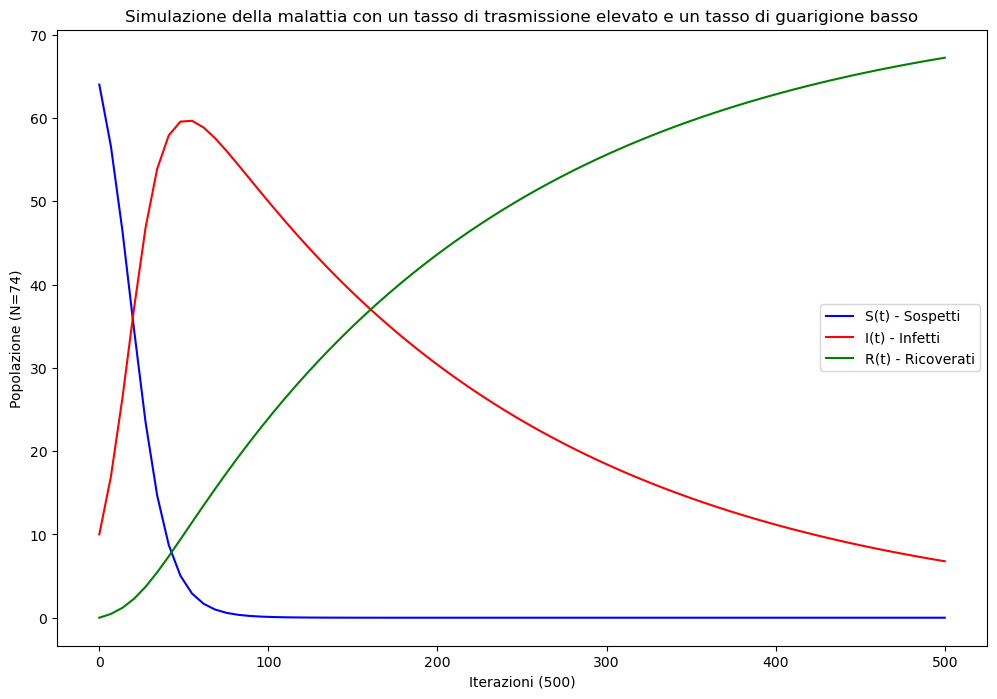

In [85]:
# Creazione di un array di tempo da 0 a 500 con 347640 punti intermedi
t = np.linspace(0, 500, 74)

# Definizione della funzione sir (Susceptible-Infectious-Recovered) che descrive il modello SIR
def sir(y, t, N, beta0, gamma0):
    S, I, R = y  # Estrarre i valori attuali di S, I e R dall'array y
    dSdt = -beta0 * S * I / N  # Equazione per la variazione di S nel tempo
    dIdt = beta0 * S * I / N - gamma0 * I  # Equazione per la variazione di I nel tempo
    dRdt = gamma0 * I  # Equazione per la variazione di R nel tempo
    return dSdt, dIdt, dRdt

# Definizione delle condizioni iniziali come un vettore y0
y0 = S0, I0, R0  # Assicurarsi che S0, I0 e R0 siano stati definiti in precedenza

# Risoluzione delle equazioni SIR usando la funzione odeint con le condizioni iniziali e i parametri
ret = odeint(sir, y0, t, args=(N, beta0, gamma0))
S, I, R = ret.T  # Estrazione dei risultati in S, I e R

# Creazione di un grafico per visualizzare i risultati
plt.figure(figsize=(12, 8))
plt.plot(t, S, 'b', label='S(t) - Sospetti')
plt.plot(t, I, 'r', label='I(t) - Infetti')
plt.plot(t, R, 'g', label='R(t) - Ricoverati')
plt.title('Simulazione della malattia con un tasso di trasmissione elevato e un tasso di guarigione basso')
plt.xlabel('Iterazioni (500)')
plt.ylabel('Popolazione (N=74)')
plt.legend()
plt.show()



In [86]:
# Calcolo di R0 (numero di riproduzione di base) come rapporto tra beta0 e gamma0
r0 = beta0 / gamma0
print(r0)

20.0


## Simulazione della diffusione della malattia con un tasso di trasmissione medio e un tasso di guarigione elevato

In [87]:
alpha1 = 0.001
beta1 = 0.01
gamma1 = 0.05

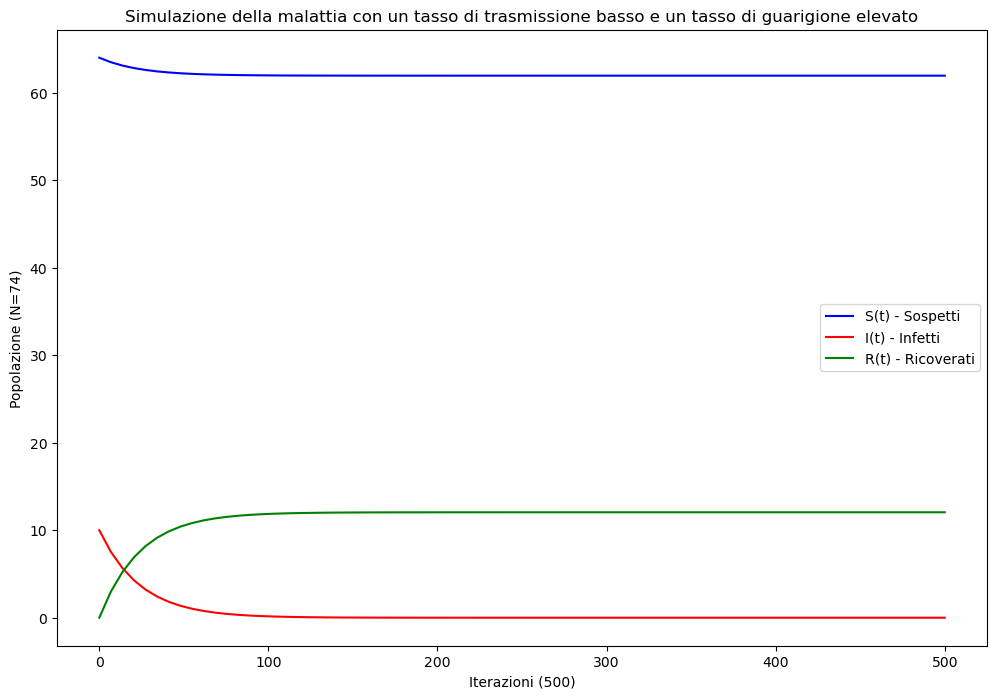

In [88]:
# Creazione di un array di tempo da 0 a 500 con 32424 punti intermedi
t = np.linspace(0, 500, 74)

# Definizione della funzione sir (Susceptible-Infectious-Recovered) che descrive il modello SIR
def sir(y, t, N, beta1, gamma1):
    S, I, R = y  # Estrarre i valori attuali di S, I e R dall'array y
    dSdt = -beta1 * S * I / N  # Equazione per la variazione di S nel tempo
    dIdt = beta1 * S * I / N - gamma1 * I  # Equazione per la variazione di I nel tempo
    dRdt = gamma1 * I  # Equazione per la variazione di R nel tempo
    return dSdt, dIdt, dRdt

# Definizione delle condizioni iniziali come un vettore y0
y0 = S0, I0, R0  # Assicurarsi che S0, I0 e R0 siano stati definiti in precedenza

# Risoluzione delle equazioni SIR usando la funzione odeint con le condizioni iniziali e i nuovi parametri
ret = odeint(sir, y0, t, args=(N, beta1, gamma1))
S, I, R = ret.T  # Estrazione dei risultati in S, I e R

# Creazione di un grafico per visualizzare i risultati
plt.figure(figsize=(12, 8))
plt.plot(t, S, 'b', label='S(t) - Sospetti')
plt.plot(t, I, 'r', label='I(t) - Infetti')
plt.plot(t, R, 'g', label='R(t) - Ricoverati')
plt.title('Simulazione della malattia con un tasso di trasmissione basso e un tasso di guarigione elevato')
plt.xlabel('Iterazioni (500)')
plt.ylabel('Popolazione (N=74)')
plt.legend()
plt.show()


In [89]:
# Calcolo di R1 (numero di riproduzione di base) come rapporto tra beta1 e gamma1
r1 = beta1/gamma1
print(r1)

0.19999999999999998


## Simulazione della diffusione della malattia con un tasso di trasmissione medio e un tasso di guarigione elevato

In [90]:
alpha2 = 0.005
beta2 = 0.05
gamma2 = 0.05

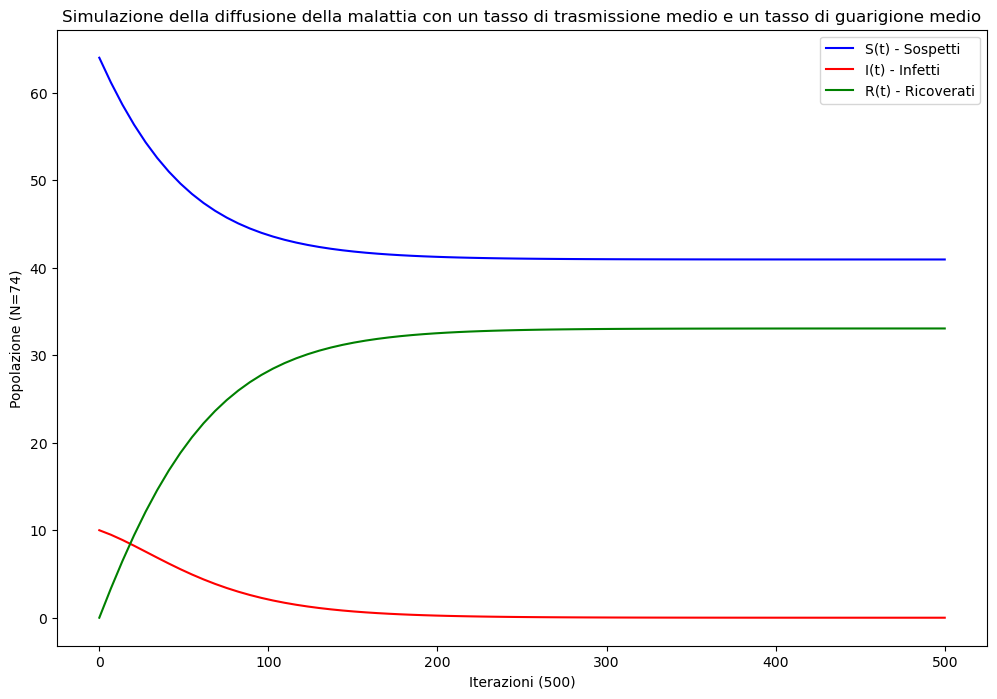

In [91]:
# Creazione di un array di tempo da 0 a 500 con 32424 punti intermedi
t = np.linspace(0, 500, 74)

# Definizione della funzione sir (Susceptible-Infectious-Recovered) che descrive il modello SIR
def sir(y, t, N, beta2, gamma2):
    S, I, R = y  # Estrarre i valori attuali di S, I e R dall'array y
    dSdt = -beta2 * S * I / N  # Equazione per la variazione di S nel tempo
    dIdt = beta2 * S * I / N - gamma2 * I  # Equazione per la variazione di I nel tempo
    dRdt = gamma2 * I  # Equazione per la variazione di R nel tempo
    return dSdt, dIdt, dRdt

# Definizione delle condizioni iniziali come un vettore y0
y0 = S0, I0, R0  # Assicurarsi che S0, I0 e R0 siano stati definiti in precedenza

# Risoluzione delle equazioni SIR usando la funzione odeint con le condizioni iniziali e i nuovi parametri
ret = odeint(sir, y0, t, args=(N, beta2, gamma2))
S, I, R = ret.T  # Estrazione dei risultati in S, I e R

# Creazione di un grafico per visualizzare i risultati
plt.figure(figsize=(12, 8))
plt.plot(t, S, 'b', label='S(t) - Sospetti')
plt.plot(t, I, 'r', label='I(t) - Infetti')
plt.plot(t, R, 'g', label='R(t) - Ricoverati')
plt.title('Simulazione della diffusione della malattia con un tasso di trasmissione medio e un tasso di guarigione medio')
plt.xlabel('Iterazioni (500)')
plt.ylabel('Popolazione (N=74)')
plt.legend()
plt.show()


In [92]:
# Calcolo di R1 (numero di riproduzione di base) come rapporto tra beta1 e gamma1
r2 = beta2/gamma2
print(r2)

1.0
